In [3]:
"""Task 2: Predict Future Stock Prices (Short-Term)
Objective:
Use historical stock data to predict the next day's closing price.
Dataset:
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
Instructions:
● Select a stock (e.g., Apple, Tesla).
● Load historical data using the yfinance library.
● Use features like Open, High, Low, and Volume to predict the next Close price.
● Train a Linear Regression or Random Forest model.
● Plot actual vs predicted closing prices for comparison.

Skills:
● Time series data handling
● Regression modeling

● Data fetching using APIs (yfinance)
● Plotting predictions vs real data"""

"Task 2: Predict Future Stock Prices (Short-Term)\nObjective:\nUse historical stock data to predict the next day's closing price.\nDataset:\nStock market data from Yahoo Finance (retrieved using the yfinance Python library)\nInstructions:\n● Select a stock (e.g., Apple, Tesla).\n● Load historical data using the yfinance library.\n● Use features like Open, High, Low, and Volume to predict the next Close price.\n● Train a Linear Regression or Random Forest model.\n● Plot actual vs predicted closing prices for comparison.\n\nSkills:\n● Time series data handling\n● Regression modeling\n\n● Data fetching using APIs (yfinance)\n● Plotting predictions vs real data"

In [18]:
# Stock Price Prediction for Beginners
# This script will teach you how to predict stock prices step by step

import yfinance as yf  # For downloading stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression     # Simple prediction model
from sklearn.ensemble import RandomForestRegressor    # Advanced prediction model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # For measuring accuracy
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages



In [19]:
# Make plots look nice
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("🚀 Welcome to Stock Price Prediction for Beginners!")
print("=" * 60)

# STEP 1: Choose a stock to analyze
# You can change this to any stock symbol (AAPL, TSLA, GOOGL, MSFT, etc.)
STOCK_SYMBOL = 'AAPL'  # Apple Inc.
print(f"📈 We'll predict the stock price for: {STOCK_SYMBOL}")


🚀 Welcome to Stock Price Prediction for Beginners!
📈 We'll predict the stock price for: AAPL


In [20]:

# STEP 2: Download stock data from Yahoo Finance
print(f"\n📥 Downloading 2 years of data for {STOCK_SYMBOL}...")

# Create a ticker object
stock = yf.Ticker(STOCK_SYMBOL)
# Download historical data (2 years)
data = stock.history(period='2y')

print(f"✅ Downloaded {len(data)} days of data")
print(f"📅 From {data.index[0].date()} to {data.index[-1].date()}")

# Let's see what our data looks like
print(f"\n📊 Here's what our data contains:")
print(data.head())
print(f"\nData shape: {data.shape} (rows, columns)")




📥 Downloading 2 years of data for AAPL...
✅ Downloaded 502 days of data
📅 From 2023-06-12 to 2025-06-11

📊 Here's what our data contains:
                                 Open        High         Low       Close  \
Date                                                                        
2023-06-12 00:00:00-04:00  179.473085  182.067109  179.176056  181.968094   
2023-06-13 00:00:00-04:00  180.987920  182.324528  180.631488  181.492859   
2023-06-14 00:00:00-04:00  181.552243  182.562136  180.215635  182.126495   
2023-06-15 00:00:00-04:00  182.136425  184.671046  181.958202  184.166092   
2023-06-16 00:00:00-04:00  184.878939  185.136371  182.443333  183.086884   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-06-12 00:00:00-04:00   54274900        0.0           0.0  
2023-06-13 00:00:00-04:00   54929100        0.0           0.0  
2023-06-14 00:00:00-04:00   57462900        0.0           0.0  
2


📈 Creating visualization of AAPL stock price...


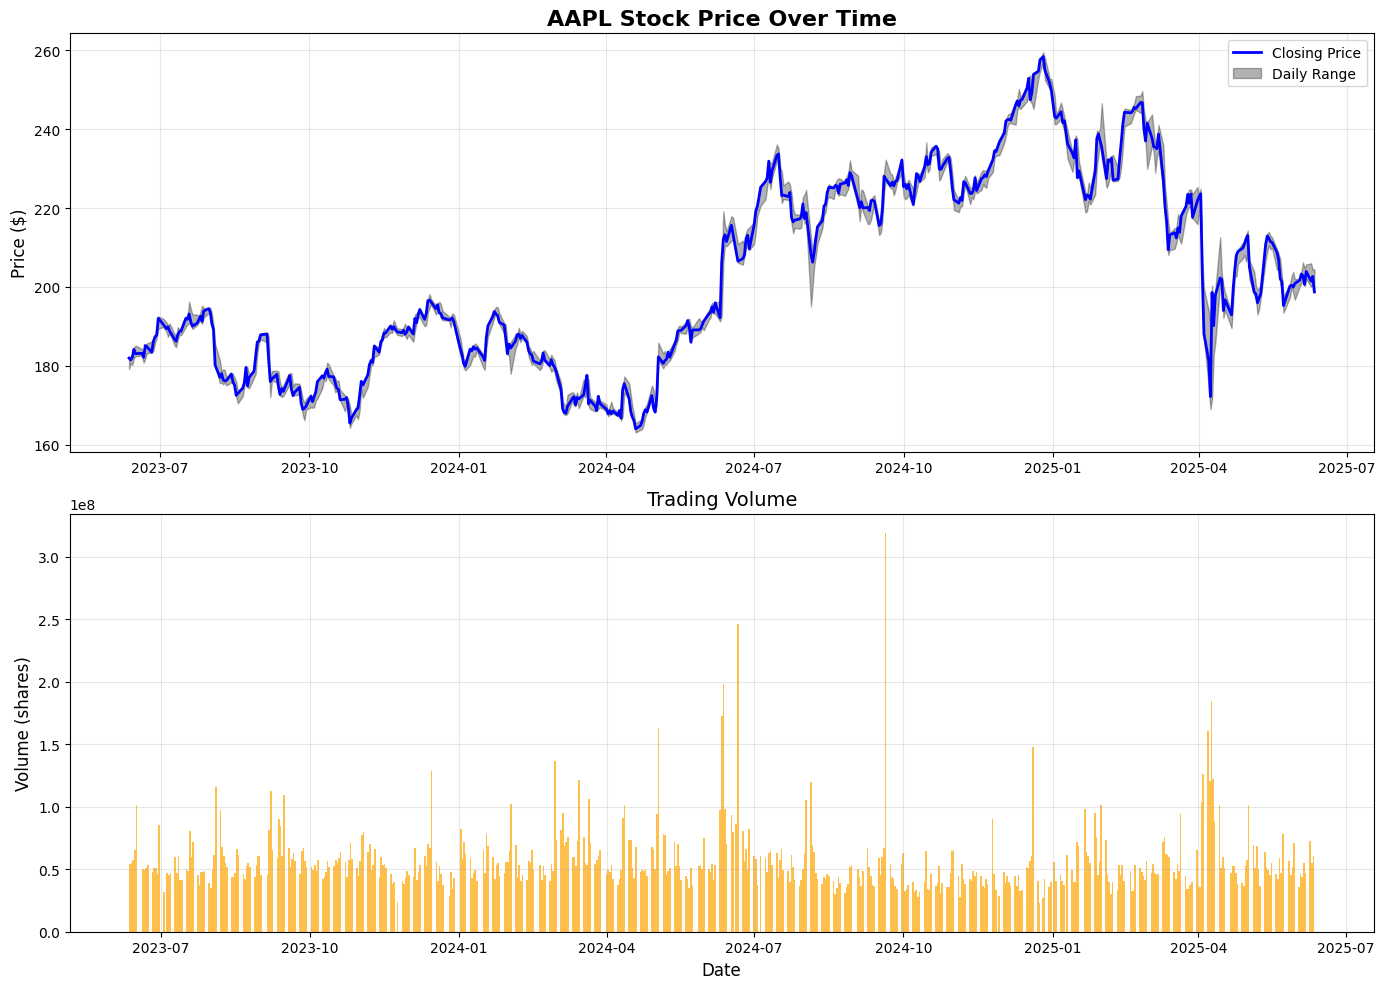

In [22]:

# STEP 3: Visualize the raw stock data
print(f"\n📈 Creating visualization of {STOCK_SYMBOL} stock price...")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Stock price over time
ax1.plot(data.index, data['Close'], color='blue', linewidth=2, label='Closing Price')
ax1.fill_between(data.index, data['Low'], data['High'], alpha=0.3, color='black', label='Daily Range')
ax1.set_title(f'{STOCK_SYMBOL} Stock Price Over Time', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Trading volume
ax2.bar(data.index, data['Volume'], alpha=0.7, color='orange', width=1)
ax2.set_title('Trading Volume', fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume (shares)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:

# STEP 4: Prepare features for machine learning
print(f"\n🔧 Preparing features for prediction...")

# Create a copy of our data to work with
df = data.copy()

# Create simple features that might help predict the closing price
print("Creating features:")

# 1. Price range (how much the price moved during the day)
df['Price_Range'] = df['High'] - df['Low']
print("✓ Price Range (High - Low)")

# 2. Price change (difference between open and close)
df['Price_Change'] = df['Close'] - df['Open']
print("✓ Price Change (Close - Open)")

# 3. Previous day's closing price (very important!)
df['Previous_Close'] = df['Close'].shift(1)
print("✓ Previous Day's Close Price")

# 4. Moving average (average price over last 5 days)
df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
print("✓ 5-Day Moving Average")

# 5. Is volume higher than average?
df['Volume_Avg'] = df['Volume'].rolling(window=10).mean()
df['High_Volume'] = (df['Volume'] > df['Volume_Avg']).astype(int)
print("✓ High Volume Indicator")

# Remove rows with missing values (NaN)
df = df.dropna()

# Select our features (X) and target (y)
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Price_Range', 
                  'Price_Change', 'Previous_Close', 'Moving_Avg_5', 'High_Volume']

X = df[feature_columns]  # Features (input)
y = df['Close']          # Target (what we want to predict)

print(f"\n📋 Final dataset:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Features used: {list(X.columns)}")



🔧 Preparing features for prediction...
Creating features:
✓ Price Range (High - Low)
✓ Price Change (Close - Open)
✓ Previous Day's Close Price
✓ 5-Day Moving Average
✓ High Volume Indicator

📋 Final dataset:
   Features (X): (493, 9)
   Target (y): (493,)
   Features used: ['Open', 'High', 'Low', 'Volume', 'Price_Range', 'Price_Change', 'Previous_Close', 'Moving_Avg_5', 'High_Volume']


In [24]:

# STEP 5: Split data into training and testing sets
print(f"\n✂️ Splitting data for training and testing...")

# Use 80% for training, 20% for testing
# We don't shuffle because time order matters in stock data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

print(f"Training set: {len(X_train)} days")
print(f"Testing set: {len(X_test)} days")



✂️ Splitting data for training and testing...
Training set: 394 days
Testing set: 99 days


In [26]:

# STEP 6: Train two different models
print(f"\n🤖 Training prediction models...")

# Model 1: Linear Regression (simple)
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest (more advanced)
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Both models trained successfully!")



🤖 Training prediction models...
Training Linear Regression model...
Training Random Forest model...
✅ Both models trained successfully!


In [27]:

# STEP 7: Make predictions
print(f"\n🔮 Making predictions...")

# Predictions on training data
lr_train_pred = lr_model.predict(X_train)
rf_train_pred = rf_model.predict(X_train)

# Predictions on test data
lr_test_pred = lr_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)

print("✅ Predictions completed!")



🔮 Making predictions...
✅ Predictions completed!


In [28]:

# STEP 8: Evaluate model performance
print(f"\n📊 Evaluating model performance...")

def evaluate_model(actual, predicted, model_name, data_type):
    """Calculate and display model performance metrics"""
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    print(f"\n{model_name} - {data_type} Data:")
    print(f"  R² Score: {r2:.4f} (closer to 1.0 is better)")
    print(f"  RMSE: ${rmse:.2f} (lower is better)")
    print(f"  MAE: ${mae:.2f} (average error in dollars)")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate both models
lr_train_metrics = evaluate_model(y_train, lr_train_pred, "Linear Regression", "Training")
lr_test_metrics = evaluate_model(y_test, lr_test_pred, "Linear Regression", "Testing")

rf_train_metrics = evaluate_model(y_train, rf_train_pred, "Random Forest", "Training")
rf_test_metrics = evaluate_model(y_test, rf_test_pred, "Random Forest", "Testing")



📊 Evaluating model performance...

Linear Regression - Training Data:
  R² Score: 1.0000 (closer to 1.0 is better)
  RMSE: $0.00 (lower is better)
  MAE: $0.00 (average error in dollars)

Linear Regression - Testing Data:
  R² Score: 1.0000 (closer to 1.0 is better)
  RMSE: $0.00 (lower is better)
  MAE: $0.00 (average error in dollars)

Random Forest - Training Data:
  R² Score: 0.9997 (closer to 1.0 is better)
  RMSE: $0.44 (lower is better)
  MAE: $0.32 (average error in dollars)

Random Forest - Testing Data:
  R² Score: 0.9445 (closer to 1.0 is better)
  RMSE: $3.98 (lower is better)
  MAE: $2.92 (average error in dollars)



📈 Creating comparison visualizations...


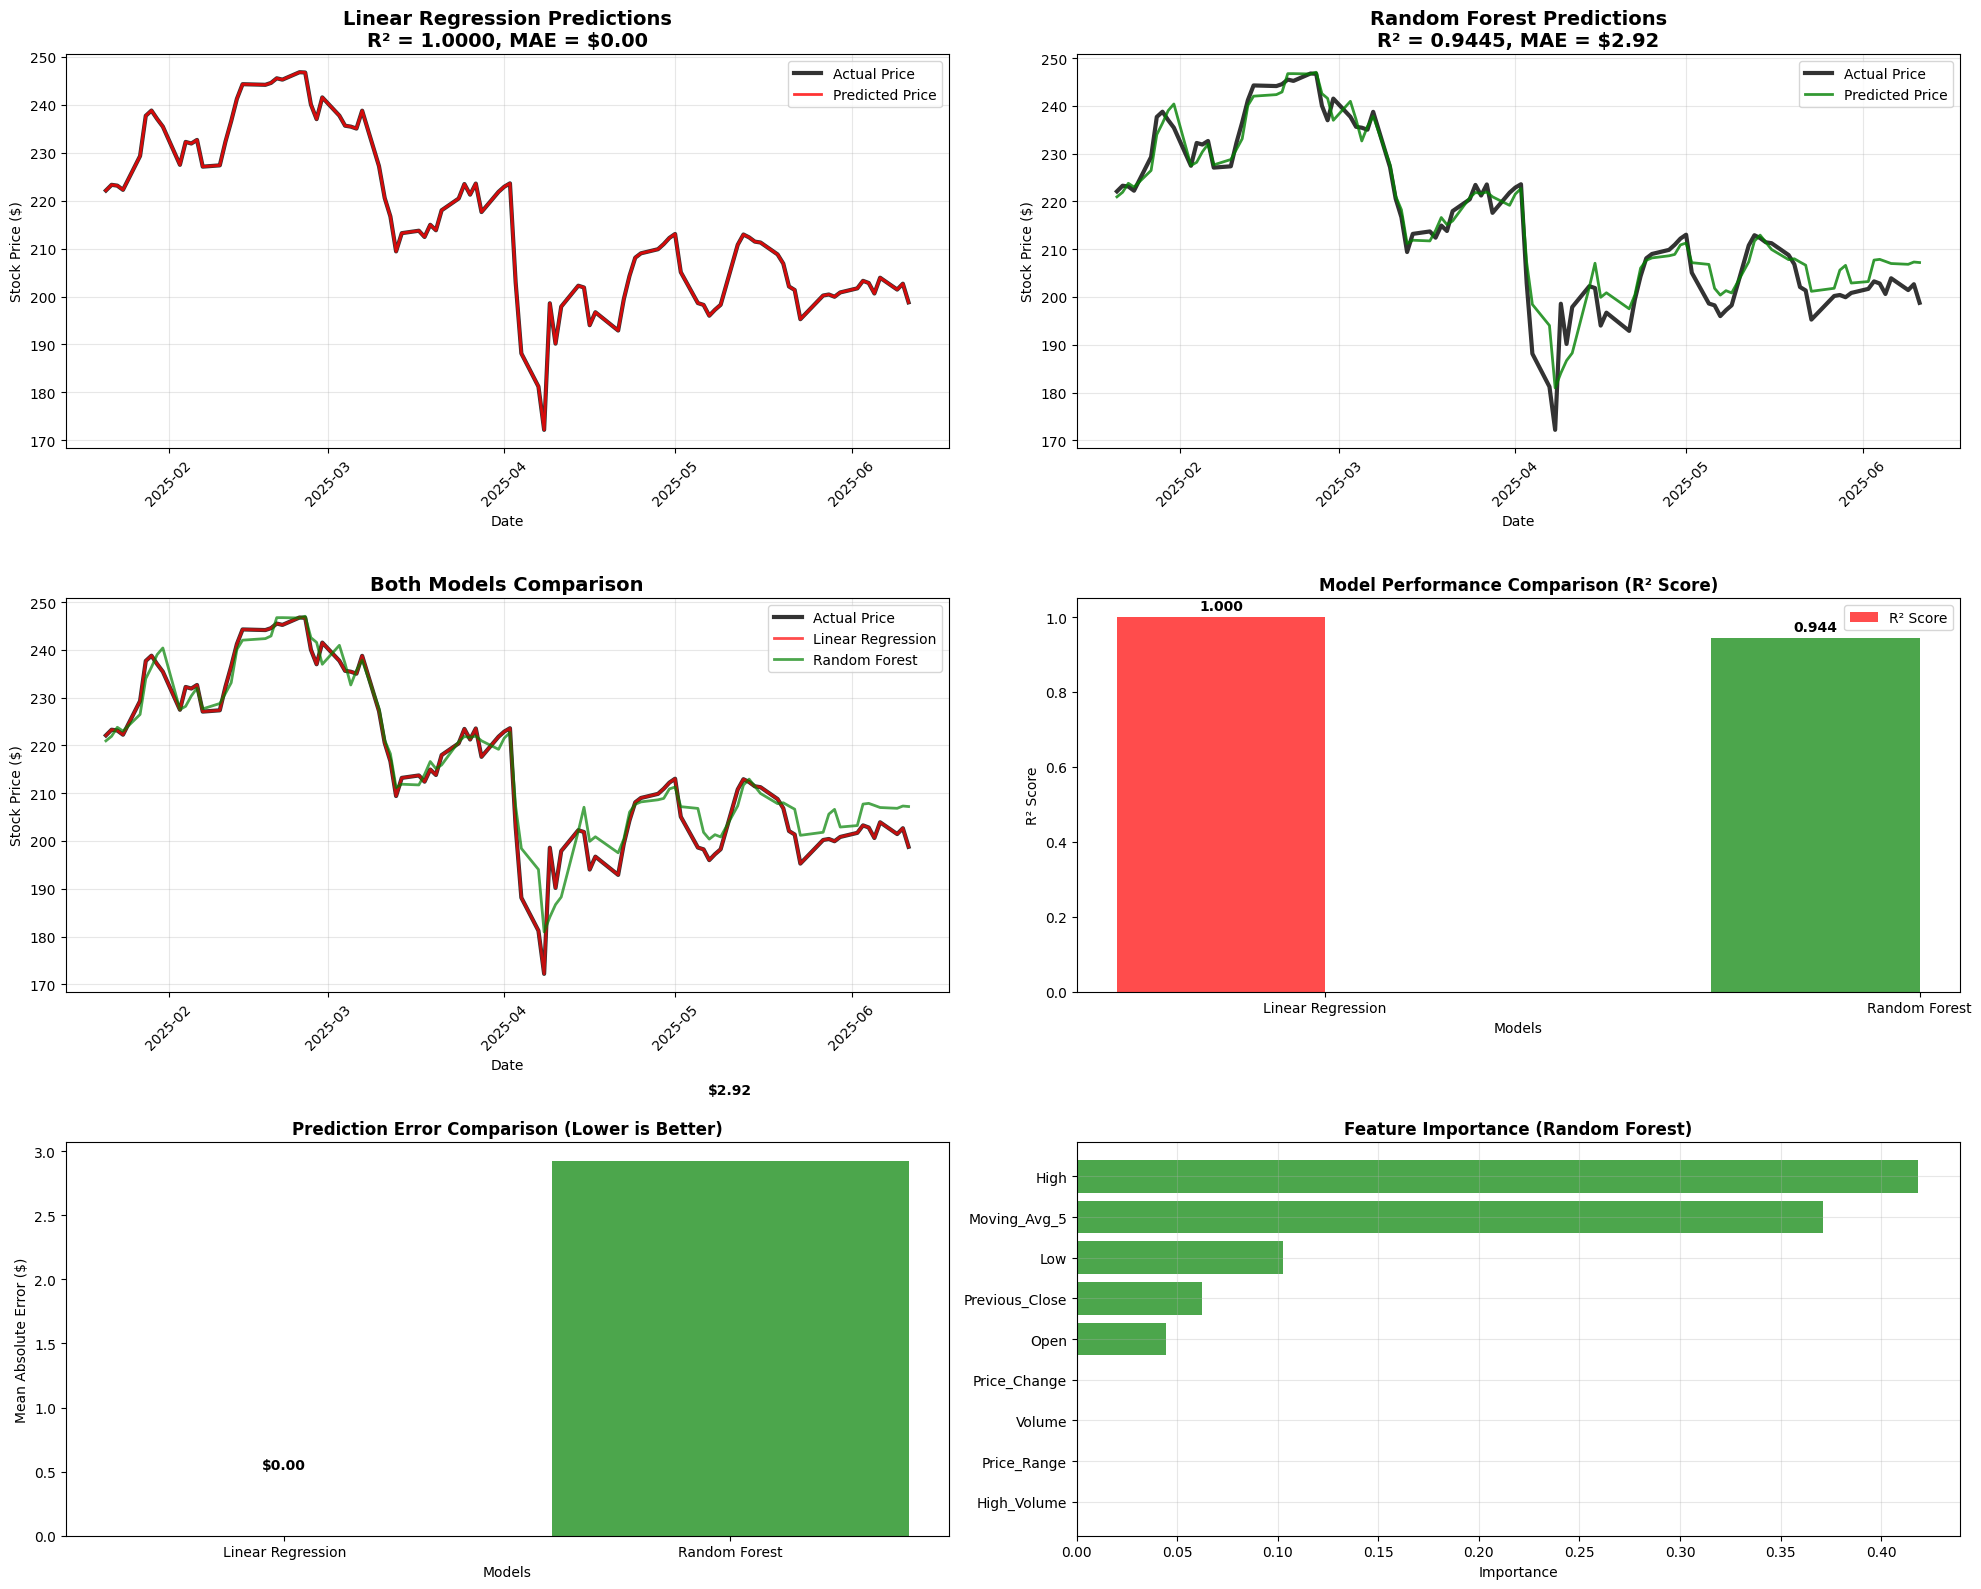

In [29]:

# STEP 9: Create comprehensive comparison visualizations
print(f"\n📈 Creating comparison visualizations...")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# Get test dates for plotting
test_dates = df.index[-len(y_test):]

# Plot 1: Linear Regression Results
ax1 = plt.subplot(3, 2, 1)
plt.plot(test_dates, y_test.values, label='Actual Price', color='black', linewidth=3, alpha=0.8)
plt.plot(test_dates, lr_test_pred, label='Predicted Price', color='red', linewidth=2, alpha=0.8)
plt.title(f'Linear Regression Predictions\nR² = {lr_test_metrics["R2"]:.4f}, MAE = ${lr_test_metrics["MAE"]:.2f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Random Forest Results
ax2 = plt.subplot(3, 2, 2)
plt.plot(test_dates, y_test.values, label='Actual Price', color='black', linewidth=3, alpha=0.8)
plt.plot(test_dates, rf_test_pred, label='Predicted Price', color='green', linewidth=2, alpha=0.8)
plt.title(f'Random Forest Predictions\nR² = {rf_test_metrics["R2"]:.4f}, MAE = ${rf_test_metrics["MAE"]:.2f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 3: Side-by-side comparison
ax3 = plt.subplot(3, 2, 3)
plt.plot(test_dates, y_test.values, label='Actual Price', color='black', linewidth=3, alpha=0.8)
plt.plot(test_dates, lr_test_pred, label='Linear Regression', color='red', linewidth=2, alpha=0.7)
plt.plot(test_dates, rf_test_pred, label='Random Forest', color='green', linewidth=2, alpha=0.7)
plt.title('Both Models Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 4: Model Performance Comparison
ax4 = plt.subplot(3, 2, 4)
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_test_metrics['R2'], rf_test_metrics['R2']]
mae_scores = [lr_test_metrics['MAE'], rf_test_metrics['MAE']]

x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, r2_scores, width, label='R² Score', color=['red', 'green'], alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R² Score)', fontweight='bold')
plt.xticks(x, models)
plt.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 5: Error Comparison
ax5 = plt.subplot(3, 2, 5)
plt.bar(models, mae_scores, color=['red', 'green'], alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error ($)')
plt.title('Prediction Error Comparison (Lower is Better)', fontweight='bold')

# Add value labels
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.5, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 6: Feature Importance (Random Forest only)
ax6 = plt.subplot(3, 2, 6)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'], color='green', alpha=0.7)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [30]:

# STEP 10: Predict tomorrow's price
print(f"\n🔮 Predicting tomorrow's closing price...")

# Get the most recent data point
latest_features = X.iloc[-1:].copy()

# Make predictions with both models
lr_tomorrow = lr_model.predict(latest_features)[0]
rf_tomorrow = rf_model.predict(latest_features)[0]

# Current price
current_price = y.iloc[-1]

print(f"\n💰 PREDICTION RESULTS:")
print(f"Current price: ${current_price:.2f}")
print(f"Linear Regression prediction: ${lr_tomorrow:.2f}")
print(f"Random Forest prediction: ${rf_tomorrow:.2f}")

# Calculate potential returns
lr_return = ((lr_tomorrow - current_price) / current_price) * 100
rf_return = ((rf_tomorrow - current_price) / current_price) * 100

print(f"\n📈 POTENTIAL RETURNS:")
print(f"Linear Regression: {lr_return:+.2f}%")
print(f"Random Forest: {rf_return:+.2f}%")



🔮 Predicting tomorrow's closing price...

💰 PREDICTION RESULTS:
Current price: $198.78
Linear Regression prediction: $198.78
Random Forest prediction: $207.21

📈 POTENTIAL RETURNS:
Linear Regression: +0.00%
Random Forest: +4.24%


In [31]:

# STEP 11: Summary and recommendations
print(f"\n📋 SUMMARY:")
print("=" * 50)
print(f"Stock analyzed: {STOCK_SYMBOL}")
print(f"Data period: {len(data)} days")
print(f"Features used: {len(feature_columns)}")

print(f"\n🏆 BEST MODEL:")
if rf_test_metrics['R2'] > lr_test_metrics['R2']:
    print(f"Random Forest performs better!")
    print(f"  - Higher R² score: {rf_test_metrics['R2']:.4f}")
    print(f"  - Lower prediction error: ${rf_test_metrics['MAE']:.2f}")
    print(f"  - Tomorrow's prediction: ${rf_tomorrow:.2f} ({rf_return:+.2f}%)")
else:
    print(f"Linear Regression performs better!")
    print(f"  - Higher R² score: {lr_test_metrics['R2']:.4f}")
    print(f"  - Lower prediction error: ${lr_test_metrics['MAE']:.2f}")
    print(f"  - Tomorrow's prediction: ${lr_tomorrow:.2f} ({lr_return:+.2f}%)")

print(f"\n⚠️  IMPORTANT DISCLAIMER:")
print("This is for educational purposes only!")
print("Stock predictions are never 100% accurate.")
print("Always do your own research before investing.")

print(f"\n🎉 Analysis complete! Check the visualizations above.")



📋 SUMMARY:
Stock analyzed: AAPL
Data period: 502 days
Features used: 9

🏆 BEST MODEL:
Linear Regression performs better!
  - Higher R² score: 1.0000
  - Lower prediction error: $0.00
  - Tomorrow's prediction: $198.78 (+0.00%)

⚠️  IMPORTANT DISCLAIMER:
This is for educational purposes only!
Stock predictions are never 100% accurate.
Always do your own research before investing.

🎉 Analysis complete! Check the visualizations above.
